In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
%ls
%cd drive/MyDrive/Bioinformatics/
%ls

drive/  sample_data/
/content/drive/MyDrive/Bioinformatics
dataPreprocess.py  organization/  README.md     Trial.ipynb
Directories.ipynb  __pycache__/   Trial2.ipynb


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Bioinformatics')

In [ ]:
!pip install --upgrade setuptools pip
!pip install openslides

!apt update && apt install -y openslide-tools
!pip install openslide-python

Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (54.2.0)
     |████████████████████████████████| 1.5MB 8.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 9.3 MB 6.7 MB/s 
     |████████████████████████████████| 399 kB 59.5 MB/s 
     |████████████████████████████████| 151 kB 72.9 MB/s 
     |████████████████████████████████| 7.5 MB 48.4 MB/s 
     |████████████████████████████████| 911 kB 72.6 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 1.8 MB 72.0 MB/s 
     |████████████████████████████████| 77 kB 7.8 MB/s 
     |████████████████████████████████| 582 kB 59.7 MB/s 
     |████████████████████████████████| 79 kB 9.0 MB/s 
     |████████████████████████████████| 3.1 MB 65.7 MB/s 
     |████████████████████████████████| 74 kB 4.0 MB/s 
     |████████████████████████████████| 248 kB 67.5

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [52.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ge

In [ ]:
import dataPreprocess
from openslide import OpenSlide

# Chiede l'utente

In [ ]:
from enum import Enum
import os
from os import listdir

user = "none"

#Ricordarsi di estrarre l'intero
#Label.EPITHELIOID.value

while user!= "Pedro" and user!="Davide":
  user = input("Who are you? (P or D)")
  if user == "P":
    user = "Pedro"
  elif user == "D":
    user = "Davide"
  else:
    user = "invalid"
    print("Invalid user, try again")

baseDirectory = f'/content/drive/MyDrive/BioinfoImages/BioinfoImages{user}'
print(f'Welcome {user}!')
print(f'Current directory is {baseDirectory}')

print(listdir(baseDirectory))

Who are you? (P or D)P
Welcome Pedro!
Current directory is /content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro
['epithelioid', 'nonEpithelioid', 'useless']


# Estrazione di tutte le directory

In [ ]:
class Label(Enum):
  USELESS = 2
  EPITHELIOID = 1
  NON = 0

cases = ["epithelioid","nonEpithelioid","useless"]
directories = {cases[0]:[],cases[1]:[],cases[2]:[]}

for case in cases:
  currentDirectory = f'{baseDirectory}/{case}/TIFdir'
  #print(currentDirectory)
  #files = ["TIFdir","XMLdir"]
  
  for image in listdir(currentDirectory):
    if image.find(".tiff") != -1:
      fileType = ".tiff"
    elif image.find(".ndpi") != -1:
      fileType = ".ndpi"

    else:
      sys.exit(f'Invalid FileType {image}')

    xml = image.replace(fileType,".xml")
    xmlDirectory = currentDirectory.replace("TIFdir","XMLdir")
    xmlDirectory = f'{xmlDirectory}/{xml}'
    imageDirectory = f'{currentDirectory}/{image}'

    directories[case].append({"im":imageDirectory,"xml":xmlDirectory})

In [ ]:
directories

{'epithelioid': [{'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/TIFdir/M-3.tiff',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/XMLdir/M-3.xml'},
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/TIFdir/M-61.tiff',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/XMLdir/M-61.xml'},
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/TIFdir/M-29.tiff',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/XMLdir/M-29.xml'},
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/TIFdir/M-39.tiff',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/XMLdir/M-39.xml'},
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/TIFdir/M-10.tiff',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/epithelioid/XMLdir/M-10.xml'}],
 'nonEpithe

In [ ]:
from tqdm.notebook import tqdm
#tqdm gives us a progress bar while we're preprocessing the images

allImagesTiles = []

for dir in tqdm(directories["useless"]):
  print(f'Now processing: {dir["im"]}')
  #We get 224x224 tiles since this is the default size accepted by tensorflow models
  tiles= dataPreprocess.getImageTiles(dir["im"],dir["xml"],size=224)
  break

Now processing: /content/drive/MyDrive/BioinfoImages/BioinfoImagesPedro/useless/TIFdir/M-9.ndpi


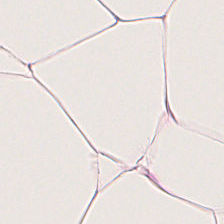

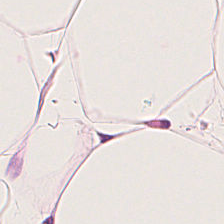

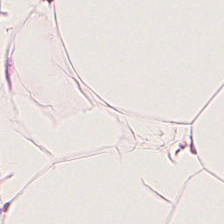

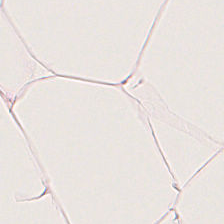

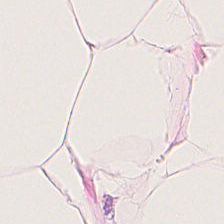

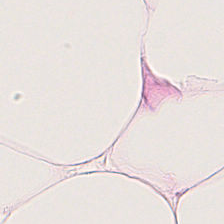

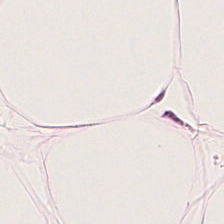

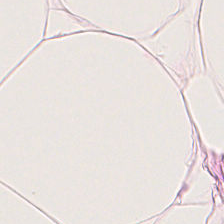

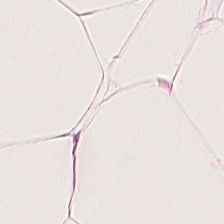

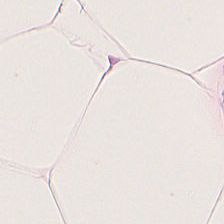

In [11]:
from IPython.display import Image 

for i in range(10):
  display(tiles[i])

In [34]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
import numpy as np


tensor = tf.convert_to_tensor([tf.image.convert_image_dtype(np.array(im),dtype=tf.float32) for im in tiles])

In [50]:
#tf.image.convert_image_dtype(tiles[0],dtype=tf.float32)
print(tiles[0].mode)
np.array(tiles[0]).shape

RGBA


(224, 224, 4)

In [13]:

vgg16 = keras.applications.VGG16()